In [18]:
import pandas as pd
from scipy.stats import chi2_contingency

# 加载数据
file_path = 'arrivals.xlsx'
data = pd.read_excel(file_path)

# 选择需要的列
data = data[["Station","Time of arrival (in minutes)"]]

# 对到达时间进行分组，保证每组大约有350人
data['Time Group'] = pd.cut(data["Time of arrival (in minutes)"], bins=[0, 350, 700, 1050, 1400, 1750, data["Time of arrival (in minutes)"].max()], labels=['0-350', '350-700', '700-1050', '1050-1400', '1400-1750', '1750+'], right=False)

# 创建列联表
contingency_table = pd.crosstab(data["Station"], data["Time Group"])

# 进行卡方独立性检验
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 输出结果

print("Contingency Table:")
print(contingency_table)
print(f"Chi2: {chi2}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p}")
conclusion = "Based on the p-value of 0.48, we conclude that there is no significant association between\nthe 'Station' and 'Time of arrival (in minutes)' variables, and we consider them to be independent."
print(conclusion)


Contingency Table:
Time Group  0-350  350-700  700-1050  1050-1400  1400-1750  1750+
Station                                                          
A              33       43        30         34         32     35
B              17       37        37         30         22     46
C              31       31        34         36         28     36
D              32       36        27         34         33     45
Chi2: 14.603323469467096
Degrees of Freedom: 15
P-value: 0.48034950528532405
Based on the p-value of 0.48, we conclude that there is no significant association between
the 'Station' and 'Time of arrival (in minutes)' variables, and we consider them to be independent.


In [206]:
from collections import Counter

data = data['Station']

# 使用Counter统计每个类的人数
class_counts = Counter(data)

# 计算总人数
total_count = len(data)

# 输出结果
for class_label, count in class_counts.items():
    print(f"{class_label}: {count}")

print(f"total: {total_count}")

每个类的人数:
C: 196
D: 207
A: 208
B: 189

总人数: 800


In [207]:
import numpy as np
from scipy.stats import chisquare

# 提供的观测数据
observed_frequencies = np.array([196, 207, 208, 189])

# 总观测数量
total_observations = 800

# 期望频数，假设每个类别的期望概率相等
expected_frequencies = np.full_like(observed_frequencies, total_observations / 4)

# 进行卡方拟合优度检验
chi2_stat, p_value = chisquare(observed_frequencies, f_exp=expected_frequencies)

# 输出卡方统计量和p值
print(f"Chi-squared statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.3f}")

# 根据p值判断结果
if p_value < 0.05:
    print("Reject the null hypothesis - the distribution of categories is not uniform.")
else:
    print("Do not reject the null hypothesis - the distribution of categories is likely uniform.")


Chi-squared statistic: 1.25
P-value: 0.741
Do not reject the null hypothesis - the distribution of categories is likely uniform.


### analysis out

In [13]:
def convert_out_to_txt(out_file_path, txt_file_path):
    # 读取.out文件内容
    with open(out_file_path, 'r', encoding='utf-8') as out_file:
        content = out_file.read()

    # 将内容写入.txt文件
    with open(txt_file_path, 'w', encoding='utf-8') as txt_file:
        txt_file.write(content)

# 示例用法
out_file_path = 'Vandal.out'
txt_file_path = 'Vandal.txt'
convert_out_to_txt(out_file_path, txt_file_path)


In [14]:
import re
def find_lines_with_keywords(file_path):
    
    # 打开并读取txt文件
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    # 查找每一行是否包含关键词
    for line in lines:
        if 'LessThan15' in line:
            LessTXT.append(line)
        if 'TotalNumber' in line:
            TotalTXT.append(line)
def extract_numbers(lines):
    numbers = []
    # 遍历每一行，提取数字
    for line in lines:
        match = re.search(r'\b\d+\b', line)
        if match:
            numbers.append(int(match.group()))
    
    return numbers
# 示例用法
file_path = txt_file_path
LessTXT=[]
TotalTXT=[]
find_lines_with_keywords(file_path)
Less=[]
Total=[]
Less = extract_numbers(LessTXT)
Total = extract_numbers(TotalTXT)
print(Less)
print(Total)

[2619, 3511, 2031, 3231, 2970, 3044, 2424, 2711, 2639, 2758, 2856, 2192, 2716, 3274, 1997, 3016, 1660, 3522, 3171, 2152, 2919, 2372, 3436, 2635, 3638, 3421, 2541, 2789, 3499, 3470, 3467, 2624, 3301, 2419, 3015, 3008, 3306, 3155, 3500, 3175, 3190, 3416, 3524, 3165, 2708, 3507, 2515, 3348, 2793, 3493]
[3522, 3551, 3614, 3473, 3662, 3663, 3520, 3563, 3616, 3494, 3464, 3509, 3586, 3565, 3593, 3707, 3495, 3528, 3571, 3558, 3585, 3621, 3534, 3483, 3657, 3518, 3522, 3457, 3514, 3520, 3589, 3474, 3645, 3586, 3620, 3604, 3490, 3540, 3500, 3489, 3488, 3535, 3556, 3509, 3628, 3536, 3628, 3586, 3457, 3624]


In [15]:
# 导入正则表达式模块
import re

# 定义需要提取数据的队列名称
queues = ["PickUpA.Queue.WaitingTime", "ReturnA.Queue.WaitingTime", "PickUpB.Queue.WaitingTime", 
          "ReturnB.Queue.WaitingTime",
          "PickUpC.Queue.WaitingTime", "ReturnC.Queue.WaitingTime", 
          "PickUpD.Queue.WaitingTime", "ReturnD.Queue.WaitingTime"]

# 初始化字典保存每个队列的average值
data = {queue: [] for queue in queues}

# 打开并读取文件内容
with open(txt_file_path, 'r') as file:
    lines = file.readlines()

# 正则表达式匹配行中的average值
pattern = re.compile(r'\b(\d+\.\d+)\b')
# 遍历文件中的每一行，提取所需数据
for line in lines:

    for queue in queues:
        if queue in line:
            data[queue].append(line[44:55])

# 转换函数
def convert_to_float(time_list):
    return [float(time.strip()) for time in time_list]

# 转换并打印结果
converted_data = {key: convert_to_float(value) for key, value in data.items()}

# 输出转换后的结果
print("转换后的结果:")
for key, value in converted_data.items():
    print(f"{key}: {value}")

转换后的结果:
PickUpA.Queue.WaitingTime: [0.0, 0.0, 16.36, 0.00131, 0.0, 1.1941, 0.0, 0.0, 0.0, 22.339, 14.939, 0.0, 29.418, 0.0, 0.00037296, 53.266, 21.206, 0.0, 11.757, 0.0, 7.6464, 3.676, 0.0, 0.0, 0.0, 0.02329, 4.3434, 0.0, 0.0, 0.0, 0.0, 10.612, 0.0, 3.2526, 0.0, 0.0, 0.0, 32.05, 0.0, 0.0, 3.3475, 0.0, 0.0, 0.0, 0.04406, 3.9777, 0.0, 0.0, 0.0, 10.12]
ReturnA.Queue.WaitingTime: [0.0, 3.3377, 0.0, 0.0, 57.155, 0.0, 2.8774, 77.847, 39.67, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 159.77, 0.0, 0.0, 0.0, 56.899, 0.0, 0.0, 0.0, 12.999, 0.0, 0.0, 6.9221, 0.0, 0.0, 0.0, 29.741, 7.1694, 0.0, 0.0, 0.00995, 7.9176, 0.0, 1.2651, 0.0, 16.505, 0.0, 0.0, 5.2056, 0.0, 0.0, 0.0]
PickUpB.Queue.WaitingTime: [59.766, 0.05428, 0.0, 0.1361, 0.0, 8.0499, 0.0, 1.6542, 0.0, 0.0, 0.0, 96.337, 0.0, 0.0, 141.62, 0.0, 0.0, 0.0, 0.0, 27.295, 5.317, 74.252, 0.0, 43.971, 0.36271, 0.0, 62.647, 0.74785, 0.0, 0.0, 2.333, 6.5154, 27.92, 85.443, 1.0408, 40.039, 17.441, 0.0, 0.0, 20.01, 0.0, 0.0, 4.6, 0.0, 0.0, 0.0,

In [16]:
import pandas as pd
data = pd.DataFrame(converted_data)
#data.to_csv("optimalP.csv", index=False)

In [17]:
# 筛选函数
def filter_greater_than_60(time_list):
    return [time for time in time_list if time > 60]

# 筛选并打印结果
filtered_data = {key: filter_greater_than_60(value) for key, value in converted_data.items()}

# 输出筛选后的结果
print("大于60的值:")
for key, value in filtered_data.items():
    print(f"{key}: {value}")

大于60的值:
PickUpA.Queue.WaitingTime: []
ReturnA.Queue.WaitingTime: [77.847, 159.77]
PickUpB.Queue.WaitingTime: [96.337, 141.62, 74.252, 62.647, 85.443]
ReturnB.Queue.WaitingTime: [166.57, 89.26, 60.521]
PickUpC.Queue.WaitingTime: [62.831, 82.404]
ReturnC.Queue.WaitingTime: [90.904, 76.099, 98.916]
PickUpD.Queue.WaitingTime: [69.118, 72.168, 145.11]
ReturnD.Queue.WaitingTime: [74.074, 104.65]


In [18]:
import numpy as np
import scipy.stats as stats


# 计算百分比
percent = [Less[i] / Total[i] for i in range(len(Less))]
print("Percentages:", percent)

# 计算样本标准差
S_0 = np.std(percent, ddof=1)
print("Sample standard deviation (S_0):", S_0)

# 置信水平 95%
alpha = 0.05

# 允许的误差 epsilon
epsilon = 0.05  # 可以根据需要调整

# 初始样本量估计
Z_alpha_2 = stats.norm.ppf(1 - alpha / 2)
initial_R = (Z_alpha_2 * S_0 / epsilon) ** 2

# 迭代找到合适的样本量 R
R = int(np.ceil(initial_R))
while True:
    t_alpha_2_R_minus_1 = stats.t.ppf(1 - alpha / 2, R - 1)
    new_R = (t_alpha_2_R_minus_1 * S_0 / epsilon) ** 2
    if R >= new_R:
        break
    R += 1

print("Required sample size (R):", R)


Percentages: [0.7436115843270868, 0.9887355674457899, 0.5619811842833425, 0.9303196084077167, 0.8110322228290552, 0.831012831012831, 0.6886363636363636, 0.7608756665731126, 0.7298119469026548, 0.7893531768746422, 0.8244803695150116, 0.6246793958392705, 0.7573898494143892, 0.9183730715287518, 0.5558029501809073, 0.8135958996493121, 0.474964234620887, 0.9982993197278912, 0.8879865583870065, 0.6048341765036538, 0.8142259414225942, 0.6550676608671637, 0.9722693831352575, 0.7565317255239736, 0.9948044845501778, 0.9724275156338829, 0.721465076660988, 0.8067688747468904, 0.995731360273193, 0.9857954545454546, 0.9660072443577599, 0.7553252734599885, 0.9056241426611797, 0.6745677635248187, 0.8328729281767956, 0.8346281908990011, 0.9472779369627508, 0.8912429378531074, 1.0, 0.9100028661507595, 0.9145642201834863, 0.9663366336633663, 0.9910011248593926, 0.9019663721858079, 0.7464167585446527, 0.9917986425339367, 0.6932194046306505, 0.9336307863915226, 0.8079259473531964, 0.9638520971302428]
Sampl

In [19]:
print("Required sample size (R):", R)
# sample mean
mean_percent = np.mean(percent)
print("Sample mean (mean_percent):", mean_percent)

# compute 95% confidence interval
t_value = stats.t.ppf(1 - alpha / 2, len(percent) - 1)
margin_of_error = t_value * S_0 / np.sqrt(len(percent))
confidence_interval = (mean_percent - margin_of_error, mean_percent + margin_of_error)
print("95% Confidence Interval:", confidence_interval)

# H0: mean <= 0.8 vs H1: mean > 0.8
t_statistic, p_value = stats.ttest_1samp(percent, 0.8, alternative='greater')
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# judge whether to decline Ho
if p_value < alpha:
    print("Reject the null hypothesis: The mean is significantly greater than 0.8")
else:
    print("Fail to reject the null hypothesis: The mean is not significantly greater than 0.8")

Required sample size (R): 31
Sample mean (mean_percent): 0.8319824945308334
95% Confidence Interval: (0.7934028804365059, 0.8705621086251609)
t-statistic: 1.6659375801221206
p-value: 0.05105356719448927
Fail to reject the null hypothesis: The mean is not significantly greater than 0.8


### boxplot

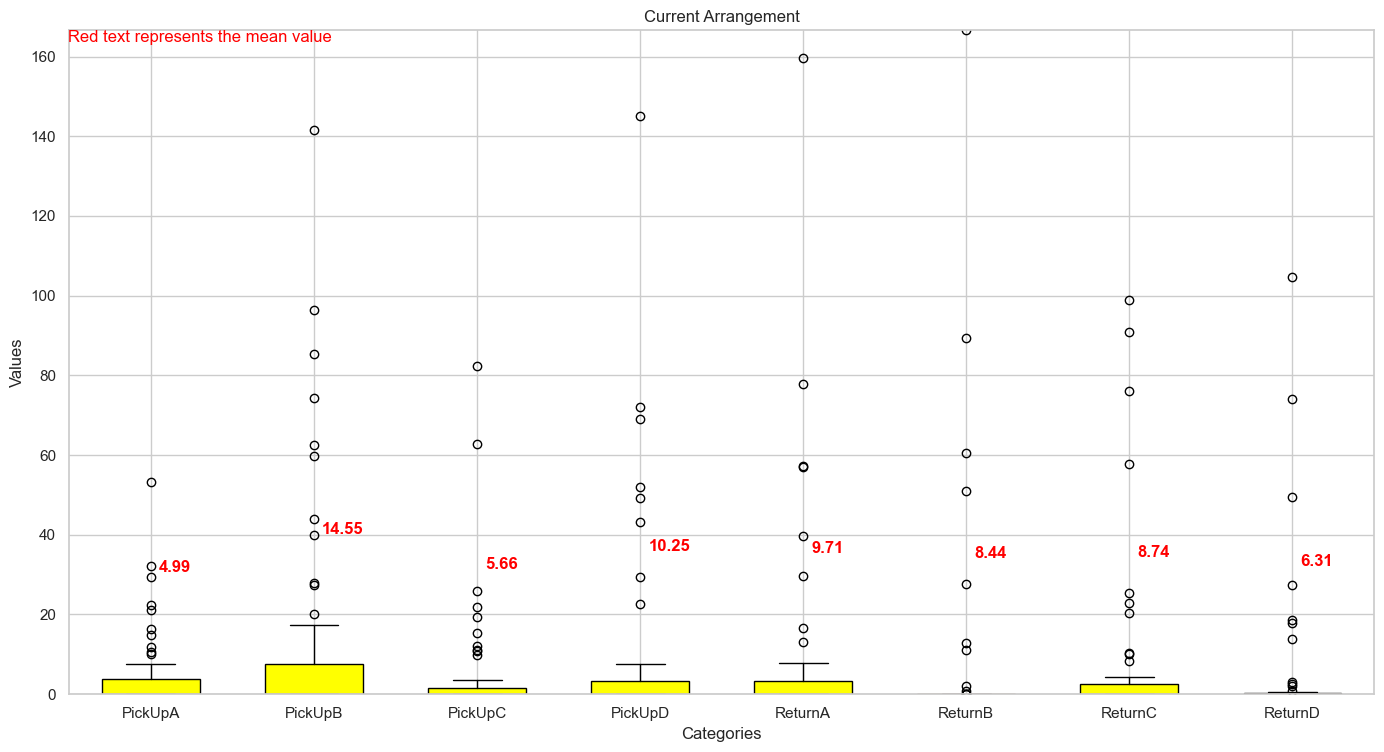

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# 保留列名称的前7个字符
data.columns = [col[:7] for col in data.columns]

# 按照需求排序列：先pickup再return
columns = data.columns
pickup_columns = [col for col in columns if 'PickUp' in col]
return_columns = [col for col in columns if 'Return' in col]
sorted_columns = pickup_columns + return_columns

# 设置seaborn样式
sns.set(style="whitegrid")

# 找出所有数据的最大值和最小值，以统一y轴范围
y_min, y_max = data[sorted_columns].min().min(), data[sorted_columns].max().max()

# 创建箱线图
fig, ax = plt.subplots(figsize=(14, 8))

# 定义亮黄色作为填充颜色
bright_color = '#FFFF00'

# 绘制数据的箱线图
for i, col in enumerate(sorted_columns):
    column_data = data[col].dropna()
    box = ax.boxplot(column_data, positions=[i], widths=0.6, patch_artist=True,
                     boxprops=dict(facecolor=bright_color))
    median = np.median(column_data)
    mean = np.mean(column_data)
    ax.text(i + 0.05, mean + 0.15 * (y_max - y_min), f'{mean:.2f}', 
            verticalalignment='bottom', color='red', weight='bold')

ax.set_xticks(range(len(sorted_columns)))
ax.set_xticklabels(sorted_columns)
ax.set_title('Current Arrangement')
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.text(0.3, y_max, 'Red text represents the mean value', 
        verticalalignment='top', horizontalalignment='center', fontsize=12, color='red')
ax.set_ylim(y_min, y_max)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

C:\Users\32048\AppData\Local\Temp\ipykernel_27428\2700192888.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=greater_than_60_count.index, y=greater_than_60_count.values, palette="viridis")


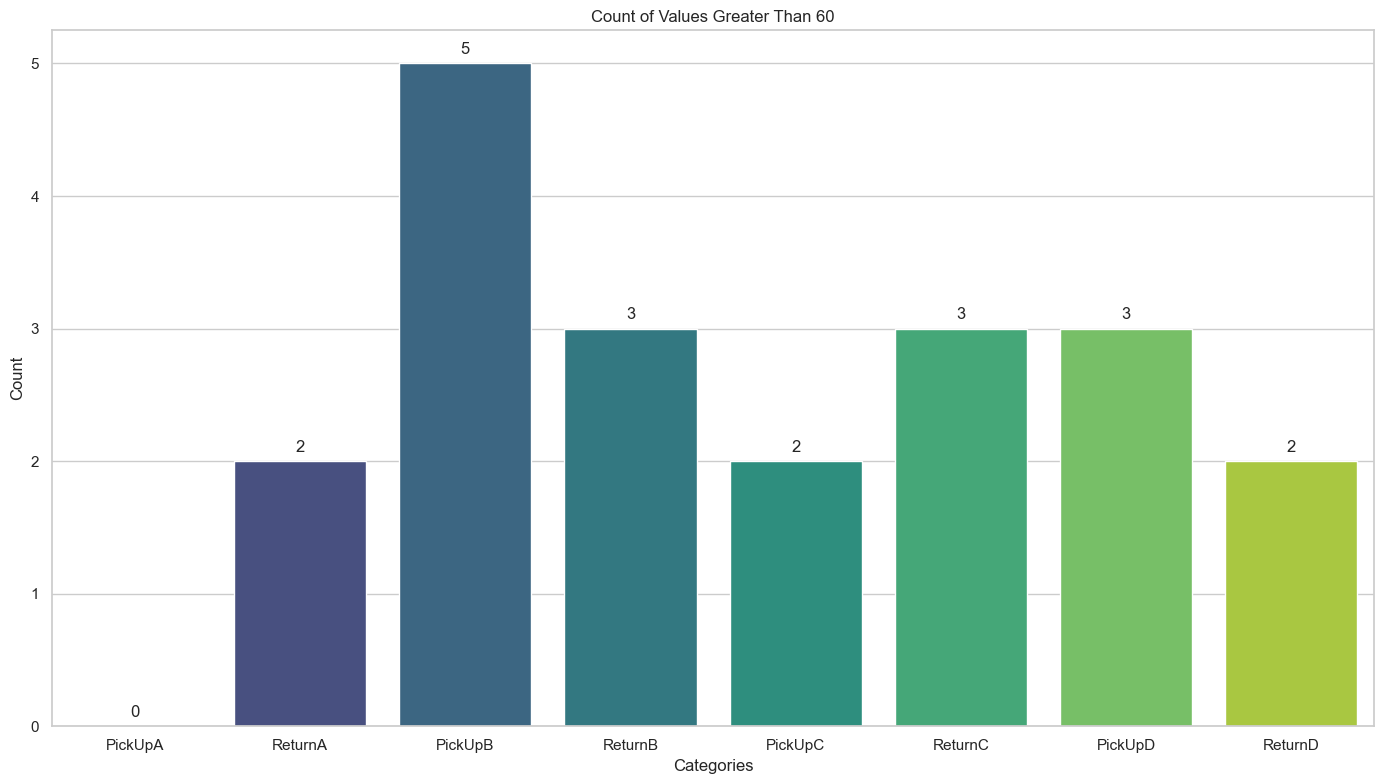

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 保留列名称的前7个字符
data.columns = [col[:7] for col in data.columns]

# 统计每列中大于60的数量
greater_than_60_count = (data > 60).sum()

# 设置seaborn样式
sns.set(style="whitegrid")

# 创建柱状图
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=greater_than_60_count.index, y=greater_than_60_count.values, palette="viridis")

# 设置标题和标签
ax.set_title('Count of Values Greater Than 60')
ax.set_xlabel('Categories')
ax.set_ylabel('Count')

# 显示数值
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()


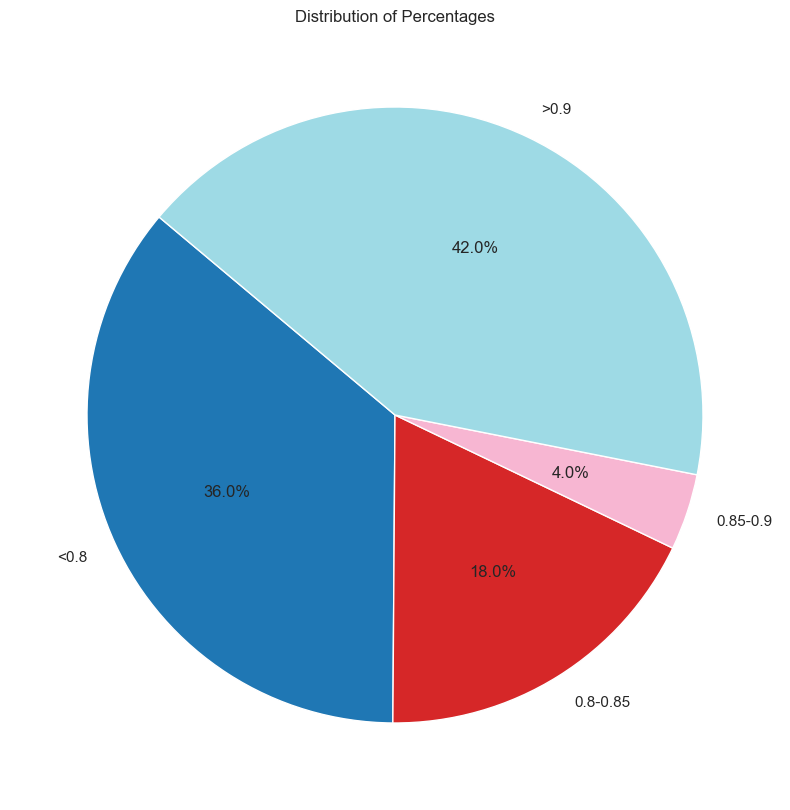

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 百分比数据
percentages = percent

# 将数据分为四个区间
labels = ['<0.8', '0.8-0.85', '0.85-0.9', '>0.9']
counts = [sum(p < 0.8 for p in percentages),
          sum(0.8 <= p < 0.85 for p in percentages),
          sum(0.85 <= p < 0.9 for p in percentages),
          sum(p >= 0.9 for p in percentages)]

# 定义颜色
colors = plt.cm.tab20(np.linspace(0, 1, len(labels)))

# 创建饼图
plt.figure(figsize=(10, 10))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Percentages')
plt.show()
